<a href="https://colab.research.google.com/github/19pa1a05c7/revised-nlp-assignment/blob/master/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df=pd.read_csv("amazon_co-ecommerce_sample.csv")
df.head(2)

uniq_id  ...                                            sellers
0  eac7efa5dbd3d667f26eb3d3ab504464  ...  {"seller"=>[{"Seller_name_1"=>"Amazon.co.uk", ...
1  b17540ef7e86e461d37f3ae58b7b72ac  ...  {"seller"=>{"Seller_name_1"=>"UHD WHOLESALE", ...

[2 rows x 17 columns]

In [5]:
df1=pd.DataFrame(df["customer_reviews"])
data= df1["customer_reviews"].str.split("//", n = 4, expand = True) 
data["review title"]=data[0]
data["rating"]=data[1]
data["date"]=data[2]
data["customer name"]=data[3]
data["review"]=data[4]
df2=data.drop([0,1,2,3,4],axis=1)
df3=df2.drop(["customer name"],axis=1)
df3['review'].fillna(df3['review'].mode()[0],inplace=True)
df3['rating'].fillna(df3['rating'].mode()[0],inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review title  9979 non-null   object
 1   rating        10000 non-null  object
 2   date          9979 non-null   object
 3   review        10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [6]:
pd.value_counts(df3["rating"])

 5.0                                                                7514
 4.0                                                                1876
 3.0                                                                 385
 2.0                                                                 117
 1.0                                                                 107
www.amazon.co.uk/gp/product/B002FVJ8EQ/ref=cm_cr_rev_prod_title        1
Name: rating, dtype: int64

In [7]:
s=df3['rating'].unique().tolist()
df3["rating"].replace(s[5],s[1],inplace=True)
pd.value_counts(df3["rating"])

 5.0     7515
 4.0     1876
 3.0      385
 2.0      117
 1.0      107
Name: rating, dtype: int64

In [0]:
for i in range(10000):
    df3["rating"][i]=int(float(df3["rating"][i]))

In [9]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
from string import punctuation
customStopWords=set(stopwords.words('english')+list(punctuation))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()

In [0]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+//')

In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wt=WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def clean_text(txt):
  tokens=tokenizer.tokenize(txt)
  txt=" ".join([wt.lemmatize(word) for word in tokens if word not in customStopWords])
  return txt

In [0]:
def labelling(x):
    if x!=3:
        if x==4 or x==5:
            return 1
        elif x==1 or x==2:
            return 0

In [15]:
df3["sentiment"]=df3["rating"].apply(lambda a:labelling(a))
df3["nlpreview"]=df3["review"].apply(lambda x:clean_text(str(x)))
df3.head()

review title  ...                                          nlpreview
0  Worth Buying For The Pictures Alone (As Ever)   ...  Part magic growing boy buy given new Hornby ca...
1                                     Four Stars   ...  Very happy communication funkybuys Five Stars ...
2                        **Highly Recommended!**   ...  Simple GREAT FUN 5 My nephew face amazing open...
3                                      I love it   ...  I love Perfect earlier ordered locomotive Agai...
4                               Birthday present   ...  Bought Grandson birthday He currently collecti...

[5 rows x 6 columns]

In [16]:
pd.value_counts(df3["sentiment"])

1.0    9391
0.0     224
Name: sentiment, dtype: int64

In [0]:
df3['sentiment'].fillna(0.0,inplace=True)

In [18]:
pd.value_counts(df3["sentiment"])

1.0    9391
0.0     609
Name: sentiment, dtype: int64

In [19]:
tok = RegexpTokenizer('\S+')
res=df3["nlpreview"].apply(lambda x:tok.tokenize(str(x)))
res

0       [Part, magic, growing, boy, buy, given, new, H...
1       [Very, happy, communication, funkybuys, Five, ...
2       [Simple, GREAT, FUN, 5, My, nephew, face, amaz...
3       [I, love, Perfect, earlier, ordered, locomotiv...
4       [Bought, Grandson, birthday, He, currently, co...
                              ...                        
9995    [Very, true, Batman, classic, series, 1960, hi...
9996    [Its, Christmas, present, however, I, see, gra...
9997                      [arrived, excellent, condition]
9998    [Okay, Hal, Jordan, figure, come, go, There, n...
9999    [1st, class, kit, top, mark, bandai, good, pai...
Name: nlpreview, Length: 10000, dtype: object

In [0]:
res2=[]
i=0
while i<10000:
  res2=res2+res[i]
  i=i+1

In [0]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

def plot_freq_dist(words,num_words = 20):
    plt.figure(figsize=(20,7))
    
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)

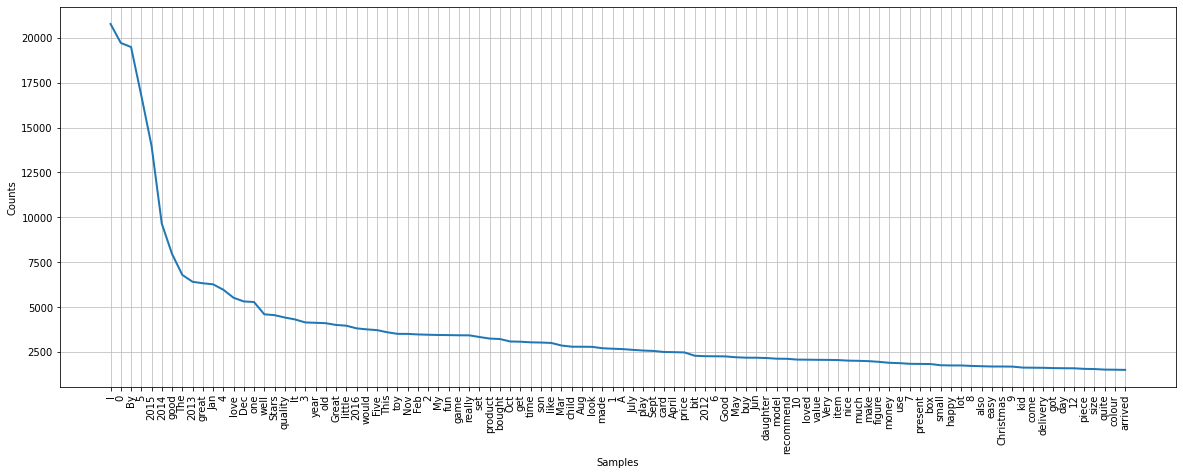

In [22]:
plot_freq_dist(res2,num_words=100)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english",analyzer='word')
x=tfidf.fit_transform(df3["nlpreview"])
print(x.shape)

(10000, 33363)


In [0]:
x_train=tfidf.fit_transform(df3["nlpreview"][0:7000])
x_test=tfidf.transform(df3["nlpreview"][7000:10000])

In [0]:
y_train=df3["sentiment"][0:7000]
y_test=df3["sentiment"][7000:10000]

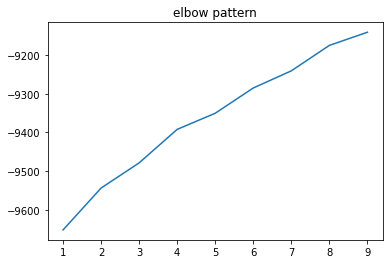

In [89]:
pav=[]
for j in range(1,10):
  kmeans=KMeans(n_clusters=j,max_iter=100,n_init=1,random_state=0)
  kmeans.fit(x)
  pav.append(kmeans.score(x))
plt.plot(range(1,10),pav)
plt.title('elbow pattern')
plt.show()


In [90]:
km=KMeans(n_clusters=8,max_iter=100,n_init=1,random_state=0)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [91]:
km.labels_

array([2, 1, 3, ..., 7, 0, 1], dtype=int32)

In [0]:
nav=sorted(zip(km.labels_,df3["nlpreview"]))


In [153]:
p=sorted(km.labels_)
cl1=0
cl2=0
cl3=0
cl4=0
cl5=0
cl6=0
cl7=0
cl8=0
for i in p:
    if i==0:
        cl1+=1
    elif i==1:
        cl2+=1
    elif i==2:
        cl3+=1
    elif i==3:
        cl4+=1
    elif i==4:
        cl5+=1
    elif i==5:
        cl6+=1
    elif i==6:
      cl7+=1
    elif i==7:
      cl8+=1
tup=(cl1,cl2,cl3,cl4,cl5,cl6,cl7,cl8)
clcount=list(tup)
b=[sum(clcount[0:x+1]) for x in range(0,len(clcount))]
b

[4120, 4781, 7399, 9075, 9260, 9671, 9859, 10000]

In [120]:

nav1=[list(el) for el in nav]
cluster1=nav1[0:b[0]]
cluster2=nav1[b[0]:b[1]]
cluster3=nav1[b[1]:b[2]]
cluster4=nav1[b[2]:b[3]]
cluster5=nav1[b[3]:b[4]]
cluster6=nav1[b[4]:b[5]]
cluster7=nav1[b[5]:b[6]]
cluster8=nav1[b[6]:b[7]]
def makingstringfromcluster(cluster1,cluster11,cls1):
  cluster11=[]
  cls1=" "
  for i in range(len(cluster1)):
    cluster1[i].pop(0)
    cluster11=cluster11+cluster1[i]
  for i in cluster11:
    cls1=cls1+i
  return cls1
makingstringfromcluster(cluster1,cluster11,cls1)

' 1 Kilo Rhomboid Mix Memory Foam Chips great everything need cushioning I used product make bed elderly Labrador Arthritis comfortable heat body mould memory foam shape lie support joint I also used product make pillow use car sits small back preventing usual back ache I used get commuting I also used product floor cushion recently dog fell back seat car husband brake suddenly avoid box road fell got wedged space Seats I measured space foot well made cushion block gap extend back seat width travel Vets comfort hydrotherapy session She cannot wear car harness anymore benign fatty lump harness sat back wear one device clip onto collar one end clip seat belt also available Amazon Also happy recommend product awful smell either Five Stars 5 0 21 Mar 2015 By Mr R Gilbertson Ricky 21 Mar 2015 Great10 1010 1010 10 worth money wait I reccomend buying spare incase break10 minute defuse tonne bomb ship blow Well What game What boil rolling dice matching card represent bomb managed capture game 

In [121]:
makingstringfromcluster(cluster2,cluster22,cls2)

' 1st class kit top mark bandai good painting dont need snap fix kit dont let put keep coming bandai Fantastic kit 5 0 13 Oct 2015 By D A BROWN 13 Oct 2015 Fantastic kit well fiddly tiny part replace broken bit piping fault Handy hint fit side pod engine placed piping support wing ignore plane say For kit 1 72 I surprised size kit laser beam inserted 30 cm long Nice You also get three pilot figure two tiny amazingly detailed R2 unit nice NOT AS DESCRIBED 2 0 5 Mar 2016 By bobby 5 Mar 2016 Ok read like didnt wont help Although say Assembly required No specification actually model kit 100 tiny piece If thats thing great I hoping would le box thing coming Japan I cant return I must pay postage worth maybe one day get around building probably tbh Y Wings cool still get 2 star Worth waiting 3 0 13 Jan 2016 By souper 13 Jan 2016 I bought model back 15th December known coming Japan would take long looked locally needle say mega happy finally arriving last week cannot wait get around making al

In [122]:
makingstringfromcluster(cluster3,cluster33,cls3)

' 2 year ago I purchased metal frame pool tried clean skooba vac line made hole bottom mainly seam Tried mending didnt work purchased easy set pool sits inside old one Its great make new hole old pool side take hose work fine The Intex pool seems better quality blue frame pool well The metal frame supportsthe inflated ring little head hitting inflated ring softer metal pole Rubish buy 1 0 20 Jun 2013 By Katie 20 Jun 2013 The idea pool ok pool big construction The side weak go mean much height I want refund rubish amazon accept even thought hasnt used filled water I wouldnt recommend buy one Get one side pole load better Great fun 5 0 26 Jun 2010 By Amazon Customer 26 Jun 2010 This great product great value exceptionally easy set fun The grandchild wait get everytime come Don forget also ground cover ladder really essential2nd Pegasus purchase quite pleased result Easy assemble good level detail No flash part fit well Good potential conversion Five Stars 5 0 29 Oct 2014 By Alex 29 Oct 2

In [123]:
makingstringfromcluster(cluster4,cluster44,cls4)

' 1Good daughter happy Five Stars 5 0 14 Oct 2015 By peter kemp 14 Oct 2015 nice Four Stars 4 0 11 Aug 2015 By Alan Noddings 11 Aug 2015 It ok Five Stars 5 0 21 Jun 2015 By Libby 21 Jun 2015 Good2nd one I bought First son second gift Nice bright object Great 1 Keeps busy also good looking toy home Not nice cheese mouse string 3 0 24 Sept 2015 By franh 24 Sept 2015 Not nice cheese mouse string simply tied one hole always come Nice attractive toy otherwise Hit miss kid 3 0 21 Jan 2015 By Franklin 21 Jan 2015 Brought Xmas 1 year old sibling 3 year far played much Its lovely solid item tactile touch I hoping interest later grow maybe Lovely toy 5 0 16 Mar 2015 By C Poole 16 Mar 2015 A fab bright chunky toy bought 2 year old loving Very Hungry Caterpillar story moment use prop read Looks good enough eat Five Stars 5 0 19 Jan 2015 By jason r 19 Jan 2015 Awesome little Buy Perfect hand eye coordination Brightly coloured really fun great stocking filler 5 0 4 Jan 2015 By Jane 4 Jan 2015 We spe

In [124]:
makingstringfromcluster(cluster5,cluster55,cls5)

' ALL GOOD THANK YOUAll goodAll good Thank You muchArrived good time All good work well Son happy ThankArrived time good quality value moneyGOODGOOD QUALITY ITEMGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGood carGood detailGood funGood funGood funGood item well pleased good serviceGood productGood productGood productGood product expectedGood product good value good service ThankGood purchaseGood qualityGood qualityGood qualityGood qualityGood qualityGood qualityGood qualityGood quality arrived timeGood quality good priceGood quality priceGood quality priceGood valueGood valueGood valueGood value moneyGood value moneyGood value moneyGood value priceGood value priceGood would buyGreat Value money good qualityIt good toyIt really goodLook goodNice size seems good quality far Good price Very pleased Bought 2 half year old good fitOn time good productReally good qualityReally good qualitySeems good qualityThese great value good quality balloon son loved Good price I would defin

In [125]:
makingstringfromcluster(cluster6,cluster66,cls6)

' 100 satisfied quick delivery A5 fast delivery great seller thanksA happy neice ThankA lovely little item arrived quick well packaged made well attractive looking pleased purchase It go room doll houseA present grandson collector item Expensive item wanted long time Considering came delivery goodA really lovely item Both enjoyable educational Really loved grandson Excellent delivery well sooner expectedA superb model fantastic value pleased purchaseAbsolutely great exactly good quality A pleased partnerAlthough I need use 26th July delivery quick easy No complaint thanksAmazing good quality small Very HappyAmazing service fast efficient also great quality productArrived fast excellent condition red pictured though matterOverall happy productArrived good time describedArrived promptly I wanted really pleasedArrived promptly described would orderArrived quickly described Great giftArrived quickly happy cardArrived quickly well packed described happy 5Arrived well packed Quick delivery C

In [126]:
makingstringfromcluster(cluster7,cluster77,cls7)

' A great costumeAlways great detail small scale great valueDelivered said great n product great My little one loveGREATGREATGood value Great carGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreat 5 year oldGreat GameGreat GiftGreat I wantedGreat I wantedGreat I wantedGreat Item thanksGreat Product great service thankyouGreat ThanksGreat balloonGreat bannerGreat bannerGreat buyGreat buyGreat buy great price daughter 10 loveGreat buy thanksGreat classGreat condition great productGreat describedGreat fanGreat fitGreat funGreat funGreat fun childGreat fun quality toyGreat gameGreat giftGreat itemGreat itemGreat itemGreat itemGreat itemGreat itemGreat itemGreat itemGreat item I highly recommendGreat item thank AGreat item thanksGreat jobGreat little boy moon great quality serviceGreat little girlGreat little handGreat little modelGreat make Great quality Still well used item grandson All

In [127]:
makingstringfromcluster(cluster8,cluster88,cls8)

' A bit expensive excellent detailAll ExcellentAn excellent toyBetter expected Excellent value moneyEXCELLENTEXCELLENTExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellent Always good quality always timeExcellent Christmas present friendExcellent RecommendedExcellent Service Excellent present husbandExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThanksExcellent arrived next dayExcellent buyExcellent colour qualityExcellent company deal good described excellent value money would recommend friend family comp

# **Visualising clusters using word cloud**

In [0]:
from wordcloud import WordCloud
def plotwordcloud(word):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word) 
  plt.figure(figsize=(10, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off') 
  plt.show()

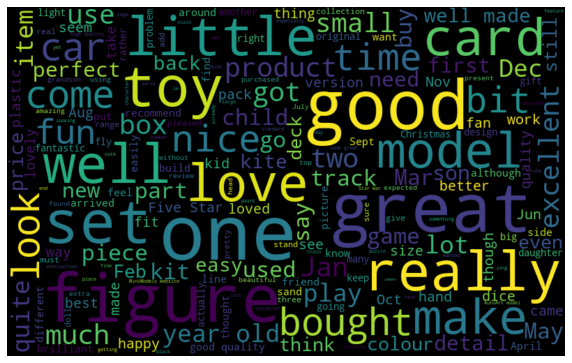

In [107]:
plotwordcloud(cls1)

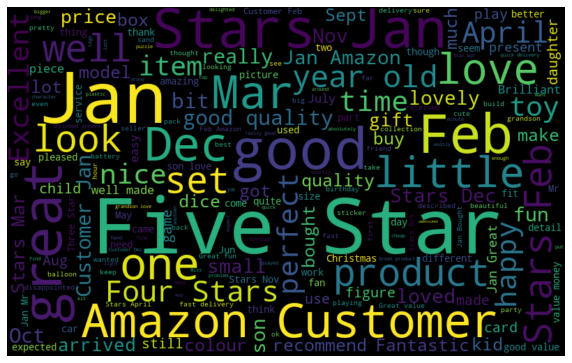

In [108]:
plotwordcloud(cls2)

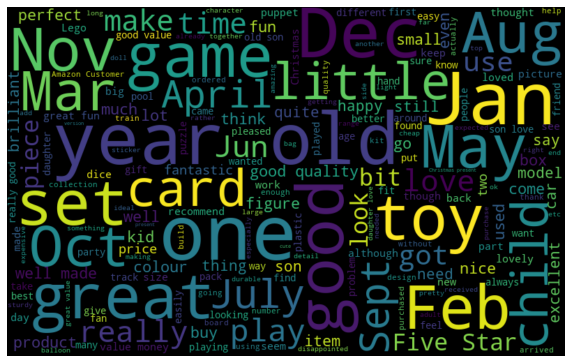

In [109]:
plotwordcloud(cls3)

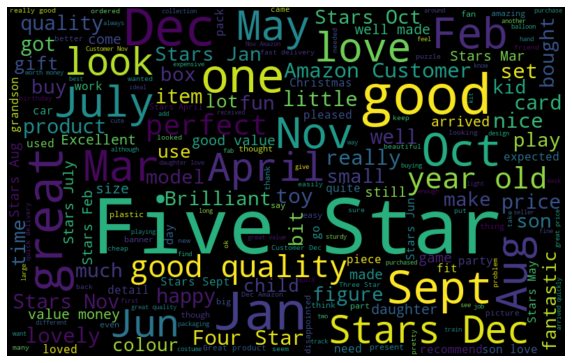

In [110]:
plotwordcloud(cls4)

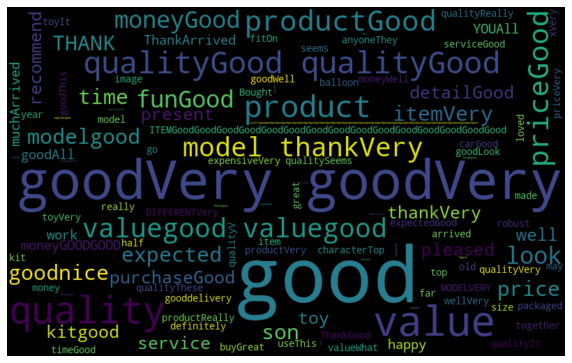

In [111]:
plotwordcloud(cls5)

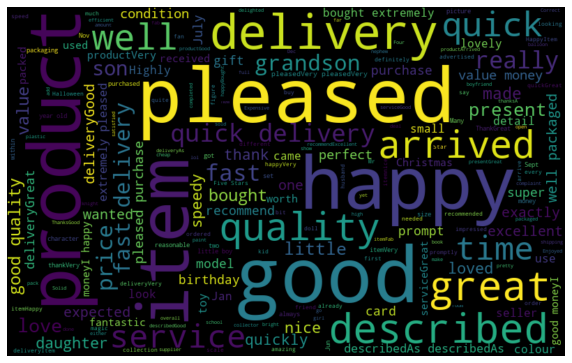

In [112]:
plotwordcloud(cls6)

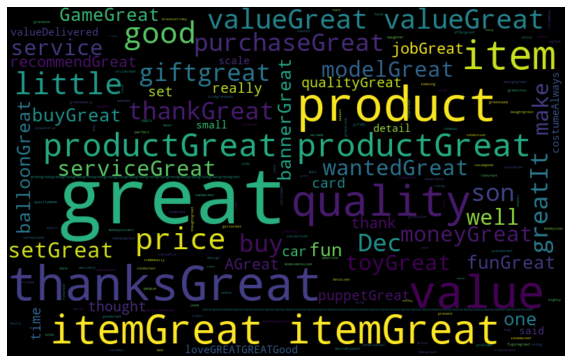

In [113]:
plotwordcloud(cls7)

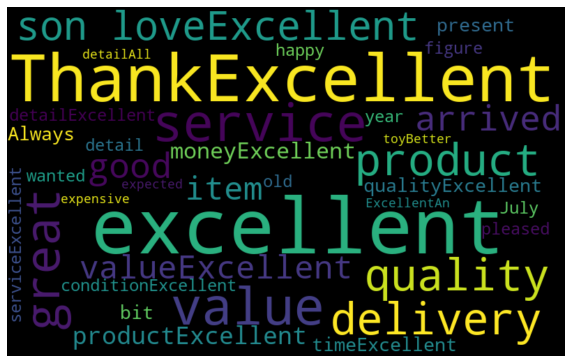

In [114]:
plotwordcloud(cls8)

# **plotting word cloud of positive and negative examples**

In [0]:
sre=" "
ers=" "
for j in range(10000):
    if df3["sentiment"][j]==1.0:
        sre=sre+df3["nlpreview"][j]
    elif df3["sentiment"][j]==0.0:
        ers=ers+df3["nlpreview"][j]

wordcloud of positive examples

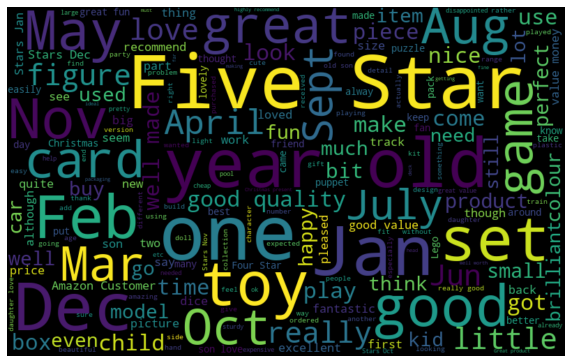

In [131]:
plotwordcloud(sre)

wordcloud of negative examples

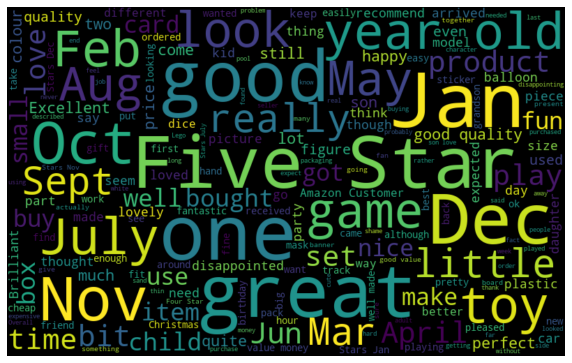

In [132]:
plotwordcloud(ers)

In [135]:
from sklearn import svm
from sklearn.metrics import classification_report
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred=classifier.predict(x_test)

In [138]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       166
         1.0       0.94      1.00      0.97      2834

    accuracy                           0.94      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.89      0.94      0.92      3000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
review = """i hate you"""
review_vector = tfidf.transform([review])
print(classifier.predict(review_vector))

[1.]


In [141]:
rev="i love u"
rev_vector = tfidf.transform([rev])
print(classifier.predict(rev_vector))


[1.]


In [0]:
#in svm model everything is predicted positive


# **lexicon approch**

In [142]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
sentiment_analyzer = SentimentIntensityAnalyzer()
scores = []
for sentence in df3["review"]:
  sentiment_score=sentiment_analyzer.polarity_scores(sentence)
  scores.append(sentiment_score)

In [144]:
for sentiment_score in scores[:10]:
  for score in sentiment_score:
         print('{0}: {1},' .format(score, sentiment_score[score]), end='')

neg: 0.0,neu: 0.811,pos: 0.189,compound: 0.9977,neg: 0.0,neu: 0.74,pos: 0.26,compound: 0.8439,neg: 0.063,neu: 0.769,pos: 0.168,compound: 0.9941,neg: 0.0,neu: 0.634,pos: 0.366,compound: 0.886,neg: 0.0,neu: 0.744,pos: 0.256,compound: 0.9939,neg: 0.0,neu: 0.865,pos: 0.135,compound: 0.6486,neg: 0.0,neu: 0.794,pos: 0.206,compound: 0.8439,neg: 0.027,neu: 0.787,pos: 0.186,compound: 0.9951,neg: 0.0,neu: 0.522,pos: 0.478,compound: 0.7506,neg: 0.027,neu: 0.857,pos: 0.115,compound: 0.9657,

In [145]:
revlex="i am not good at studying"
sentiment_score=sentiment_analyzer.polarity_scores(revlex)
sentiment_score

{'compound': -0.3412, 'neg': 0.376, 'neu': 0.624, 'pos': 0.0}

In [168]:
rec="i love u"
sentiment_score=sentiment_analyzer.polarity_scores(rec)
sentiment_score

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [0]:
def lexicon(r,lexdf):
  sentiment_score=sentiment_analyzer.polarity_scores(r)
  lexdf=pd.DataFrame(sentiment_score,index=[0])
  if lexdf["neg"][0]>0.5:
    return "neg"
  elif lexdf["neu"][0]>0.5:
    return "neu"
  elif lexdf["pos"][0]>0.5:
    return "pos"

In [172]:
ref="i hate statistics but machine learning is based on statistics and it is a good subject and also very tough to handle"
lexicon(ref,lexdf)

'neu'

In [175]:
for sen in df3["review"]:
  print(lexicon(sen,lexdf),end=" ")

neu neu neu neu neu neu neu neu neu neu pos pos pos neu neu pos neu neu pos neu neu neu neu neu neu neu pos neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu pos neu neu neu neu pos neu neu neu neu neu pos neu pos neu neu neu neu neu neu neu neu neu pos neu neu pos neu neu neu neu neu neu neu neu pos neu neu neu neu neu pos neu neu neu neu neu neu neu neu neu pos neu neu pos neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu pos neu neu neu neu neu neu neu neu pos neu neu neu neu pos neu neu pos neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu neu pos neu neu neu neu neu neu neu neu neu neu neu neu neu pos neu pos neu neu neu neu neu neu pos neu neu neu neu pos pos neu neu neu neu neu neu neu neu neu neu neu None neu neu neu neu neu pos neu neu neu neu neu neu neu neu neu neu neu neu neu neu pos neu neu neu neu pos neu neu neu neu neu neu neu neu neu neu neu neu pos neu neu neu neu pos neu pos